![](https://cdn.prod.website-files.com/628555501ce3640a820fdbb5/64c045e03f51a1a6d0be3471_642606bd7985ad26b03d4521_titanic%25202.jpeg)

-------
<h2> Table of Contents </h2>
    
<ol style= "color:brown;
            font-size:20px;">
    <li> Import Libraries</li>
    <li> Read Data</li>
    <li> Get some information about the data</li>
    <li> Data Cleaning</li>
    <li> Data Visualization & Getting Analysis </li>
    <li> Insights </li>

</ol>



---
## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

-----
## Read Data

In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

-----
## Get some information about the data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,NaN,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


-----
## Data Cleaning

In [8]:
# display duplicated rows

df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### <font color=red >No Duplicates </font>

In [9]:
# Rename Columns 

df.columns=df.columns.str.lower()

In [10]:
# remove unnecassary columns

df.drop(['passengerid','name','ticket','cabin'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### <font color=red> There are 177 Nulls in age Column and 2 Nulls in embarked Column </font>

In [12]:
# Display rows which have nulls in embarked Column

df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [13]:
# drop rows which have nulls in embarked Column

df.dropna(subset='embarked',inplace=True)

In [14]:
# Get the median of Ages for every class to male and female to can fill the nulls in age column with right values

df.groupby(['pclass','sex'])['age'].median()


pclass  sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: age, dtype: float64

In [15]:
# Function to fill Nulls in age Column

def fill_age(row):
    
    if pd.isnull(row['age']):
        
        if row['pclass']==1 and row['sex']=='female':
            return 35.0
        
        elif row['pclass']==1 and row['sex']=='male':
            return 40.0
        
        elif row['pclass']==2 and row['sex']=='female':
            return 28.0
        
        elif row['pclass']==2 and row['sex']=='male':
            return 30.0
        
        elif row['pclass']==3 and row['sex']=='female':
            return 21.5
        
        elif row['pclass']==3 and row['sex']=='male':
            return 25.0
    else:
        return row['age']
        
        
df['age']=df.apply(lambda row: fill_age(row),axis=1)

In [16]:
# Now there is no Nulls

df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [17]:
# Function to remove Outliers

def remove_outliers(col):
    q3=np.quantile(df[col],0.75)
    q1=np.quantile(df[col],0.25)
    iqr=q3-q1
    lower_limit=q1-(1.5*iqr)
    higher_limit=q3+(1.5*iqr)
    clean_data=df[(df[col] > lower_limit) & (df[col] < higher_limit)]
    return clean_data

In [18]:
# Remove Outliers from fare column

df=remove_outliers('fare')

In [19]:
# Remove Outliers from age column

df=remove_outliers('age')

In [20]:
# There are 732 Rows

df.shape

(732, 8)

## Data Visualization & Getting Analysis

In [21]:
# Function to Visualize Categorical Columns

def visualize_categ(column):
    plt.figure(figsize=(10,7))
    plt.title(f'{column.capitalize()} vs Count',fontsize=14)
    sns.countplot(x=column,data=df)
    plt.xlabel(f'{column.capitalize()}',fontsize=12)
    plt.ylabel('Count',fontsize=12)
    plt.show()

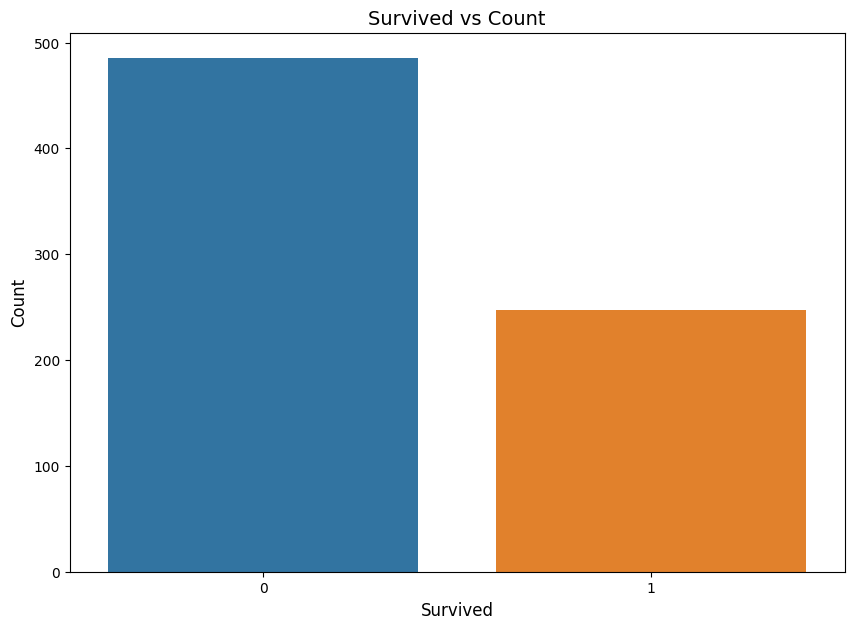

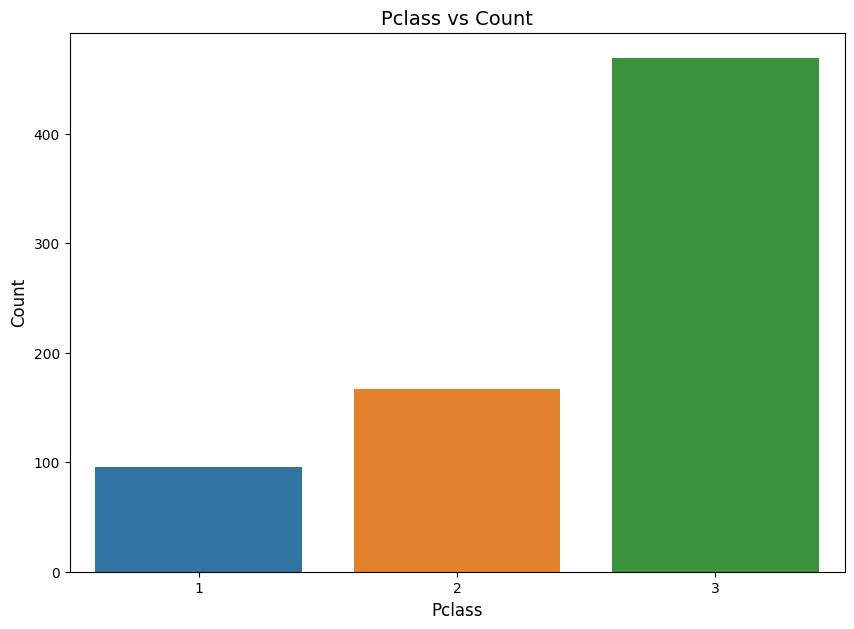

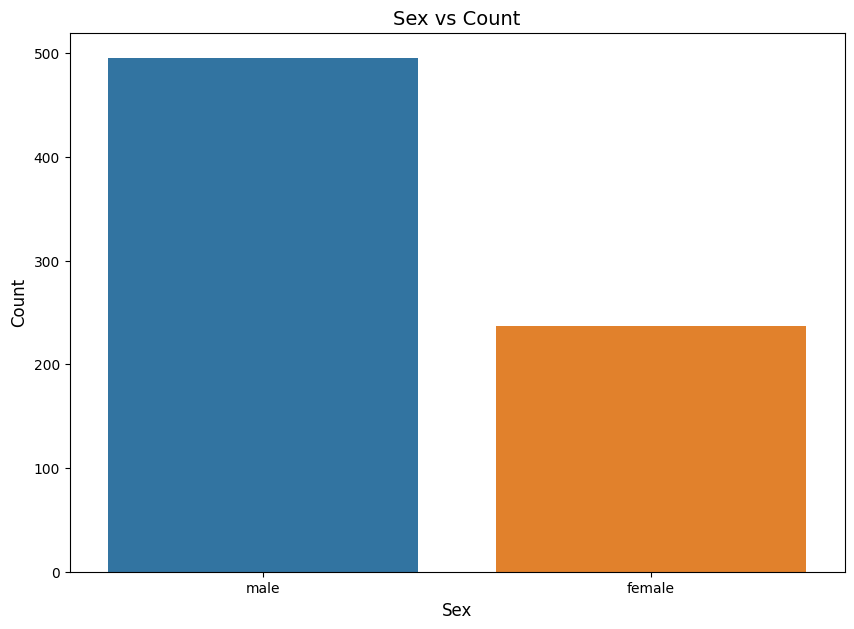

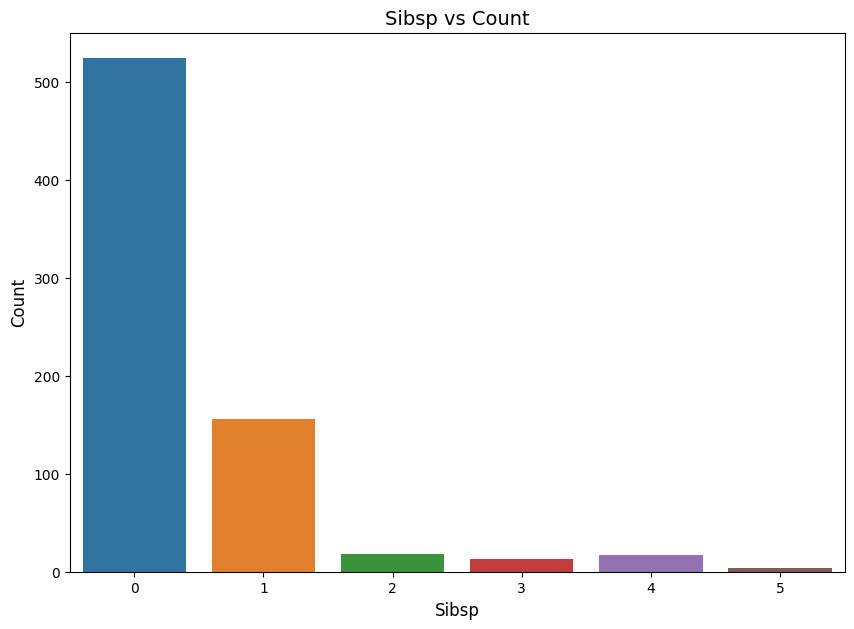

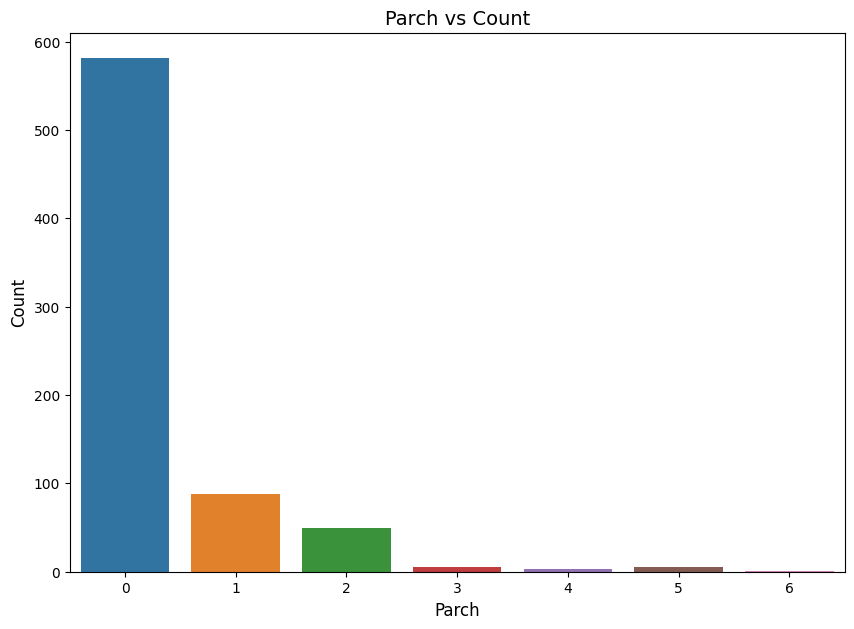

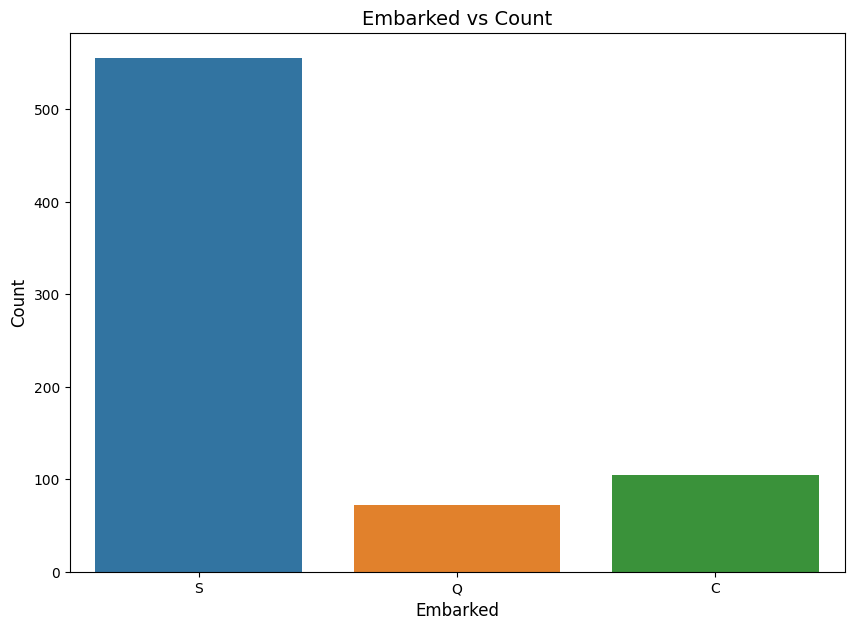

In [22]:
# Calling function to Visualize

cols=['survived','pclass','sex','sibsp','parch','embarked']

for col in cols:
    visualize_categ(col)

## <font color=red > Results </font>
<ul style= "color:black;
            font-size:19px;">
    <li> Most of the Passengers were Died</li>
    <li> Most of the Passengers were at the Class 3</li>
    <li> Most of the Passengers were males</li>
    <li> Most of the Passengers were with Zero of siblings or spouses</li>
    <li> Most of the Passengers were with Zero of of parents or children</li>
    <li> Port of Embarkation of most of the Passengers was Southampton</li>
</ul>

In [23]:
# Function to Visualize Numeric Columns

def visualize_num(column):
    plt.figure(figsize=(16,12))
    sns.displot(x=column,data=df)
    plt.title(f'{column.capitalize()} vs Count',fontsize=14)
    plt.xlabel(f'{column.capitalize()}',fontsize=12)
    plt.ylabel('Count',fontsize=12)
    plt.show()

<Figure size 1600x1200 with 0 Axes>

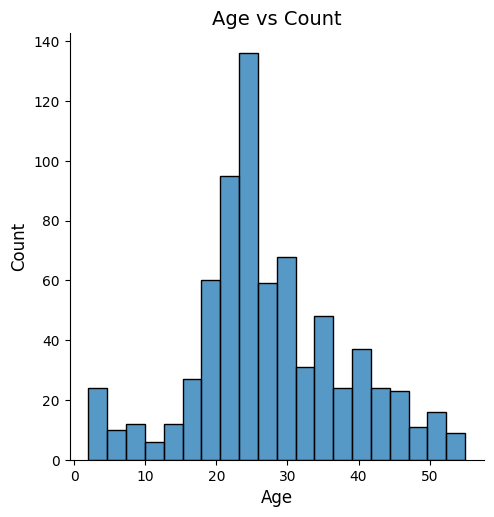

<Figure size 1600x1200 with 0 Axes>

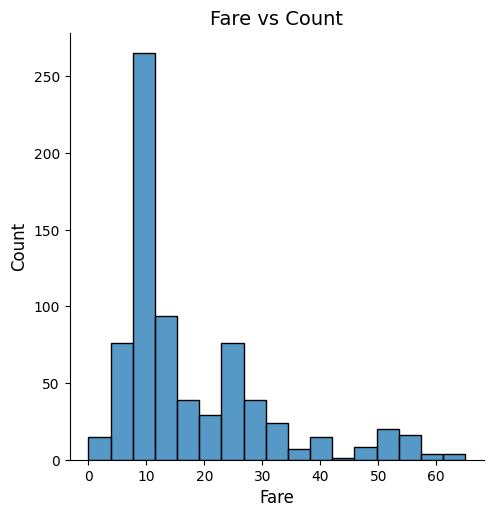

In [24]:
# Calling function to Visualize

cols=['age','fare']

for col in cols:
    visualize_num(col)

## <font color=red > Results </font>
<ul style= "color:black;
            font-size:19px;">
    <li>Age of most of the Passengers was between 15 to 40 but the most was 25</li>
    <li> Fare of most of the Passengers was between 5 to 30 but the most was roughly 10</li>
</ul>

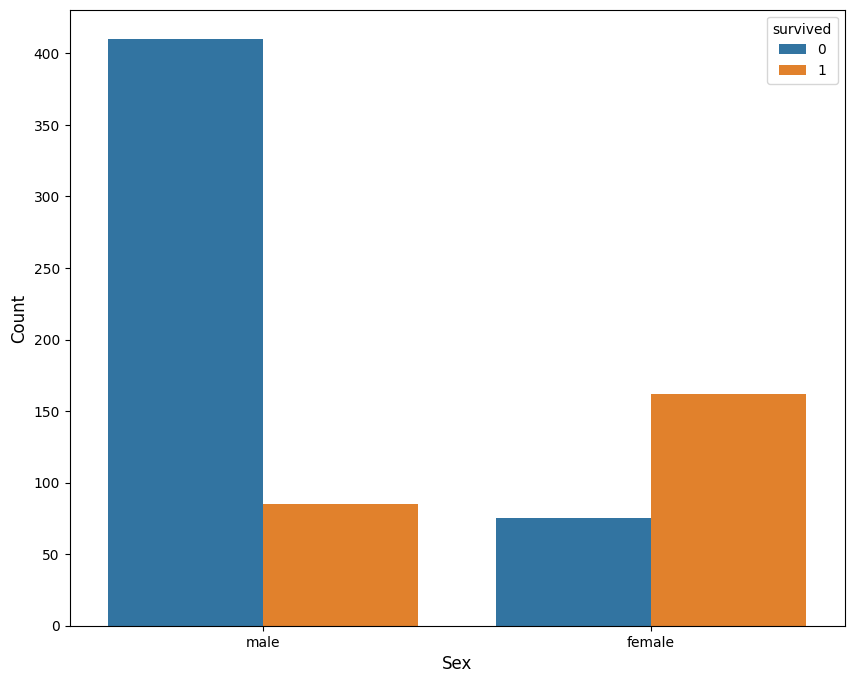

In [25]:
    # Sex & Survived vs Count
    
    plt.figure(figsize=(10,8))
    sns.countplot(x='sex',hue='survived',data=df)
    plt.xlabel('Sex',fontsize=12)
    plt.ylabel('Count',fontsize=12)
    plt.show()

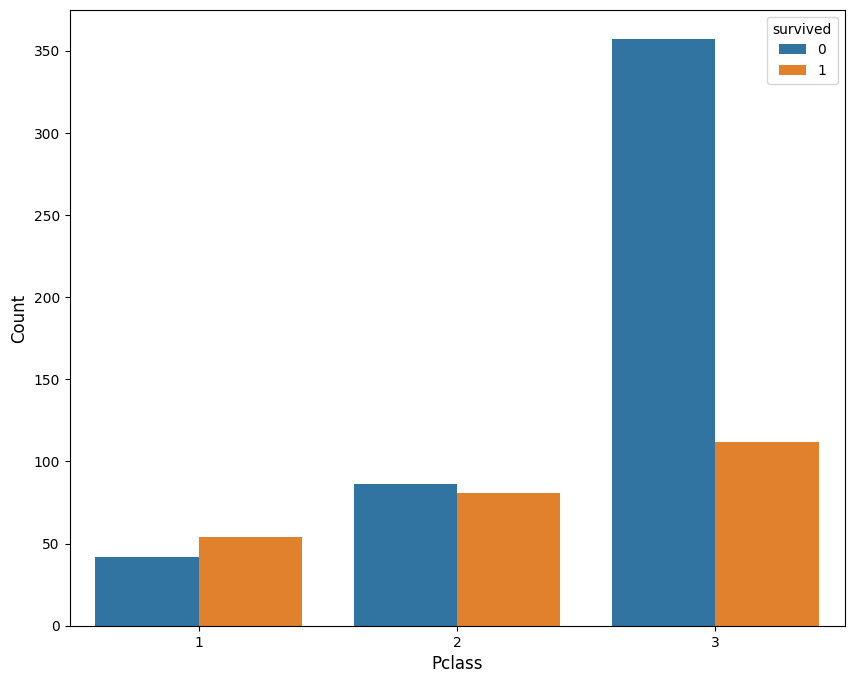

In [26]:
    # Pclass & Survived vs Count
    
    plt.figure(figsize=(10,8))
    sns.countplot(x='pclass',hue='survived',data=df)
    plt.xlabel('Pclass',fontsize=12)
    plt.ylabel('Count',fontsize=12)
    plt.show()

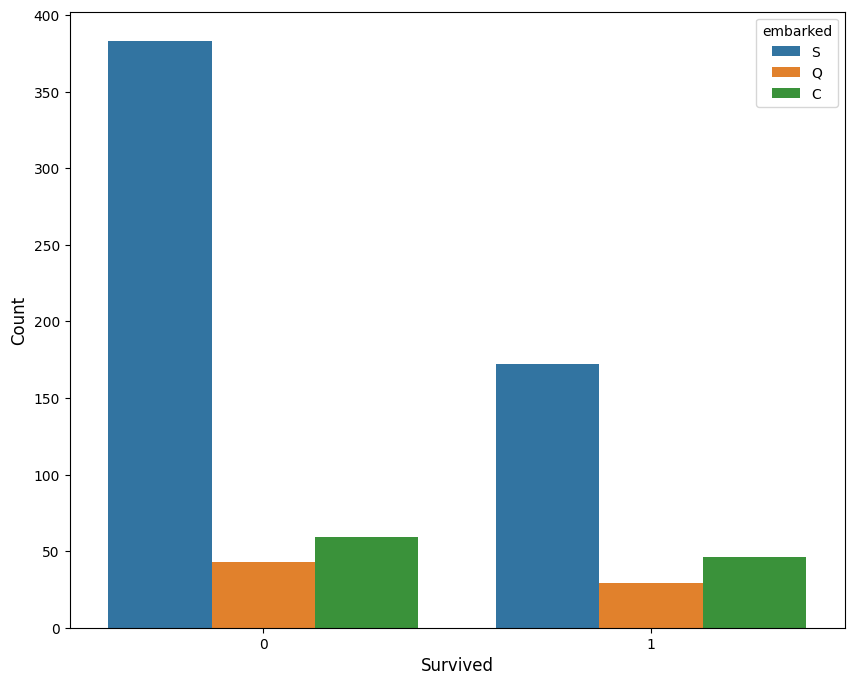

In [27]:
    # Embarked & Survived vs Count
    
    plt.figure(figsize=(10,8))
    sns.countplot(x='survived',hue='embarked',data=df)
    plt.xlabel('Survived',fontsize=12)
    plt.ylabel('Count',fontsize=12)
    plt.show()

## <font color=red > Results </font>
<ul style= "color:black;
            font-size:19px;">
    <li>Most of the males were died </li>
    <li> Most of the females were lived </li>
    <li> Most of the Passengers at the class 3 were died</li>
</ul>

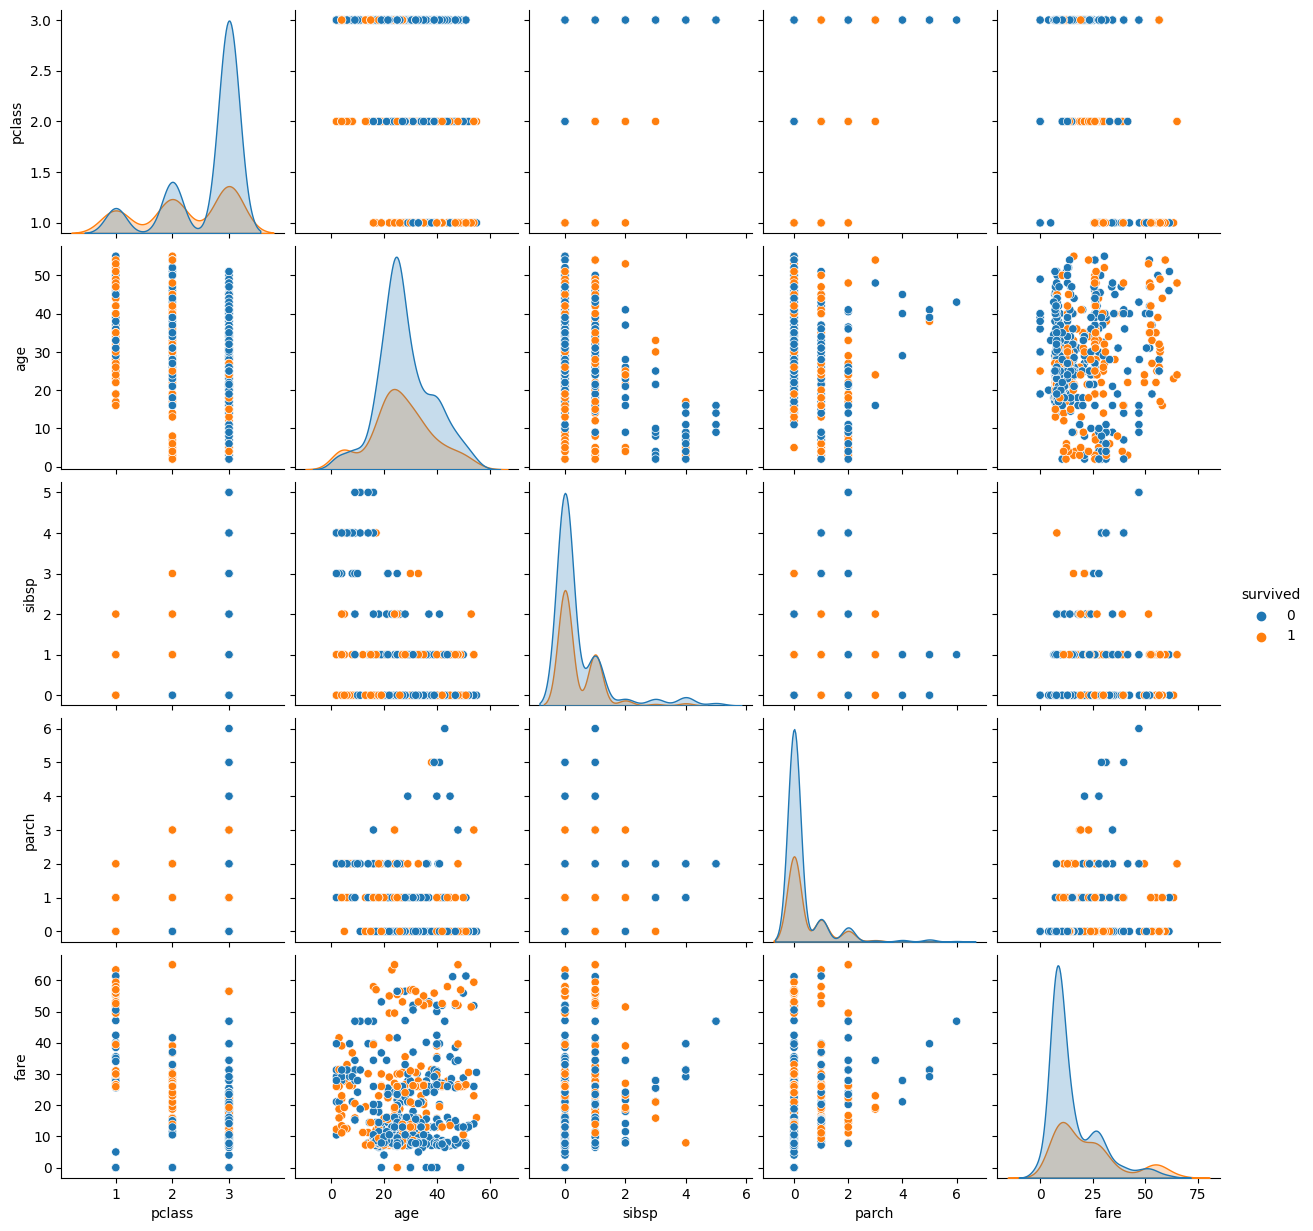

In [28]:
sns.pairplot(df,hue='survived')
plt.show()

In [29]:
df.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.273959,-0.058070,-0.011838,0.075597,0.253813
pclass,-0.273959,1.000000,-0.411397,0.093336,0.071696,-0.587519
age,-0.058070,-0.411397,1.000000,-0.322173,-0.149890,0.137254
sibsp,-0.011838,0.093336,-0.322173,1.000000,0.404213,0.376449
parch,0.075597,0.071696,-0.149890,0.404213,1.000000,0.338802
fare,0.253813,-0.587519,0.137254,0.376449,0.338802,1.000000


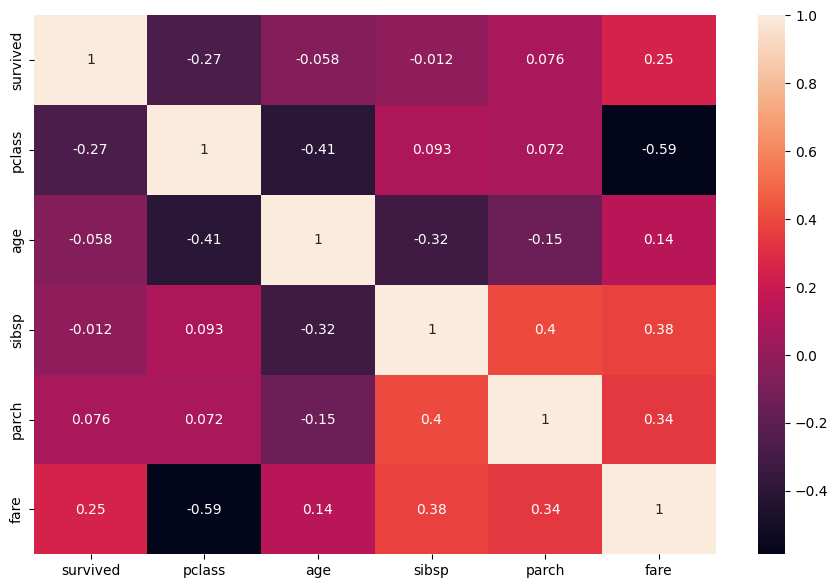

In [30]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

-----
## <font color=red > Insights </font>
<ul style= "color:black;
            font-size:20px;">
    <li> Most of the Passengers were Died</li>
    <li> Most of the Passengers were at the Class 3</li>
    <li> Most of the Passengers were males</li>
    <li> Most of the Passengers were with Zero of siblings or spouses</li>
    <li> Most of the Passengers were with Zero of of parents or children</li>
    <li> Port of Embarkation of most of the Passengers was Southampton</li>
    <li>Age of most of the Passengers was between 15 to 40 but the most was 25</li>
    <li> Fare of most of the Passengers was between 5 to 30 but the most was roughly 10</li>
    <li>The higher the pclass ---> The lower survival rate </li>
    <li> The higher the fare ---> The higher survival rate </li>
    <li> The higher the fare ---> The lower pclass</li>
</ul>